# Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning LAB 04

**ImageDataGenerator**를 이용해 실제 데이터를 활용하여 학습

- [학습 데이터](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip)
- [테스트 데이터](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip)

In [1]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('../datasets/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('../datasets/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('../datasets/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('../datasets/validation-horse-or-human/humans')

In [2]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_hames = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

In [3]:
import tensorflow as tf

In [4]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '../datasets/horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '../datasets/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [8]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 3s 403ms/step - loss: 2.0868 - accuracy: 0.6440 - val_loss: 0.8082 - val_accuracy: 0.5039
Epoch 2/15
8/8 [==============================] - 3s 435ms/step - loss: 1.3046 - accuracy: 0.7052 - val_loss: 0.8714 - val_accuracy: 0.5391
Epoch 3/15
8/8 [==============================] - 4s 495ms/step - loss: 0.2952 - accuracy: 0.9088 - val_loss: 0.6843 - val_accuracy: 0.8281
Epoch 4/15
8/8 [==============================] - 4s 531ms/step - loss: 0.1635 - accuracy: 0.9365 - val_loss: 0.9370 - val_accuracy: 0.8281
Epoch 5/15
8/8 [==============================] - 3s 429ms/step - loss: 0.1022 - accuracy: 0.9622 - val_loss: 1.9241 - val_accuracy: 0.7695
Epoch 6/15
8/8 [==============================] - 4s 448ms/step - loss: 0.0577 - accuracy: 0.9766 - val_loss: 0.9532 - val_accuracy: 0.8672
Epoch 7/15
8/8 [==============================] - 4s 448ms/step - loss: 0.0516 - accuracy: 0.9789 - val_loss: 1.1111 - val_accuracy: 0.8633
Epoch 8/15
8/8 [====

In [9]:
"""
# predicting images
path = '/content/' + fn
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(fn + " is a human")
else:
    print(fn + " is a horse")
"""

'\n# predicting images\npath = \'/content/\' + fn\nimg = image.load_img(path, target_size=(150, 150))\nx = image.img_to_array(img)\nx = np.expand_dims(x, axis=0)\n\nimages = np.vstack([x])\nclasses = model.predict(images, batch_size=10)\nprint(classes[0])\nif classes[0]>0.5:\n    print(fn + " is a human")\nelse:\n    print(fn + " is a horse")\n'

<ipython-input-10-2884a0a5503a>:44: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


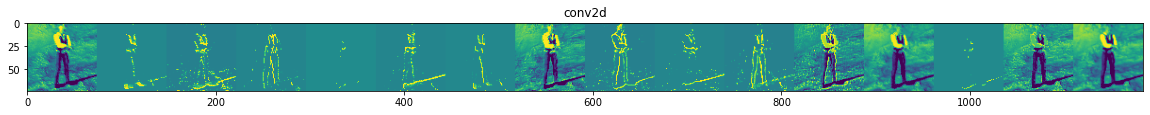

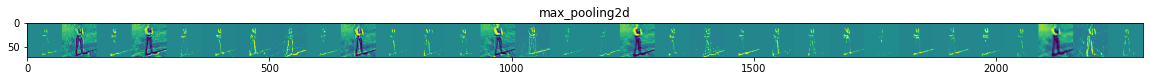

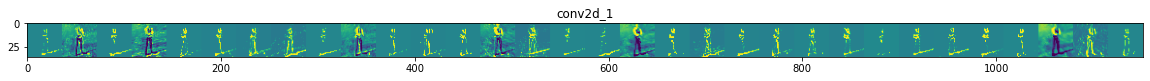

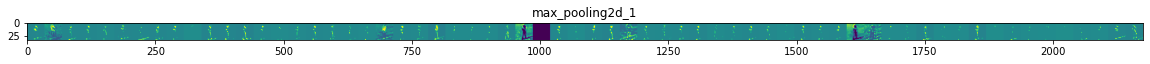

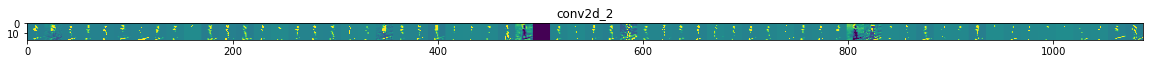

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')